<a href="https://colab.research.google.com/github/rishi132807/Predictive-Maintenance-in-Industrial-Systems-using-Machine-Learning/blob/main/Predictive_Maintenance_in_Industrial_Systems_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Maintenance in Industrial Systems using Machine Learning**


The project aims to predict and prevent machine failures using machine learning techniques. The objective is to reduce costs and downtime, ensuring more efficient and sustainable operations.  

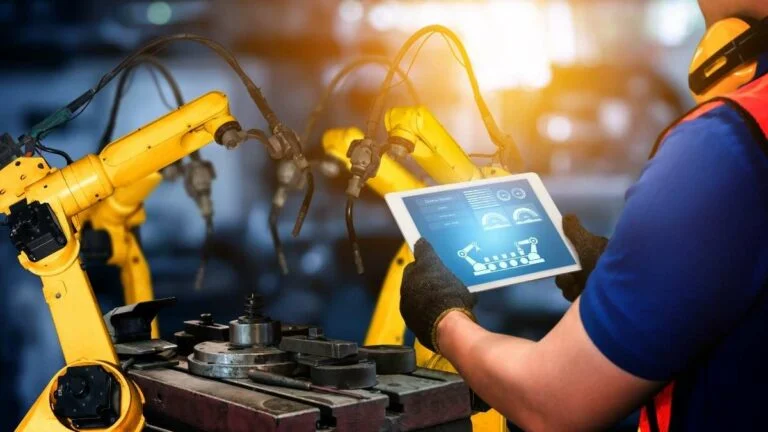

# **Summary**

*   Imports
*   Dataset Information
*   Exploratory analysis
*   Data preprocessing
*   Variable selection
*   Model
*   Evaluating the model
*   Conclusion





















# **Imports**

Importation of the libraries necessary for the development of the project.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
from sklearn import metrics
from IPython.display import display
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False


np.set_printoptions(threshold=None, precision=2)

# Dataset information


The dataset for the development of this project is the AI4I 2020 Predictive Maintenance Dataset - UC Irvine Machine Learning Repository. They are a synthetic dataset that reflects real predictive maintenance found in the industry.

The dataset consists of 10 thousand rows and 10 columns:

UID: unique identifier;

ProductID: unique product identifier consisting of a letter L, M or H for low (50% of all products), medium (30%) and high (20%) as product quality variants;

Type: product type, L low quality, M medium quality and H high quality;

Air temperature [K]: air temperature measured in Kelvin;

Process temperature [K]: process temperature, which is the temperature associated with the manufacturing process or operation of the product;

Rotational speed [rpm]: rotational speed, measured in revolutions per minute (RPM);

Torque [Nm]: rotational force measured in Newton meters (Nm);

Tool wear [min]: wear time measured in minutes;

Target: whether it fails or not;

Failure Type: Type of failure;

# Exploratory Analysis

We will apply exploratory analysis techniques to understand the data, identify patterns and possible anomalies in the data. This will help us gain initial insights into the dataset and better understand its characteristics

In [ ]:
# load data
dataset = pd.read_csv('predictive_maintenance.csv')
print('Dimensão dataset:', dataset.shape, '\n')
dataset.head()

Dimensão dataset: (10000, 10) 



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# statistical summary
dataset.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# checking the type of columns and null values
null_df = dataset.isnull().sum() * 100/len(dataset)

info_df = pd.DataFrame({'qtd_missing': dataset.isnull().sum(),
                       'percent_missing': null_df,
                       'dtype': dataset.dtypes}
                      ).reset_index().rename(columns={'index': 'column'})
info_df

,column,qtd_missing,percent_missing,dtype
0,UDI,0,0.0,int64
1,Product ID,0,0.0,object
2,Type,0,0.0,object
3,Air temperature [K],0,0.0,float64
4,Process temperature [K],0,0.0,float64
5,Rotational speed [rpm],0,0.0,int64
6,Torque [Nm],0,0.0,float64
7,Tool wear [min],0,0.0,int64
8,Target,0,0.0,int64
9,Failure Type,0,0.0,object


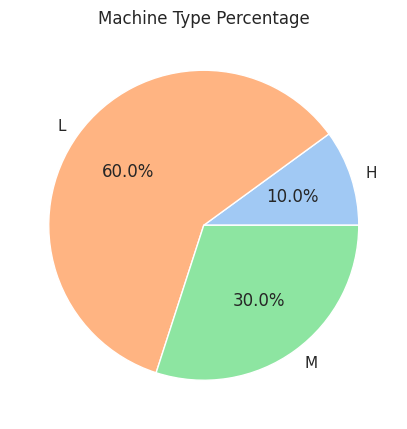

In [ ]:
qtd_product_type = dataset[['Product ID','Type']].groupby('Type').count().reset_index()

sns.set(rc={'figure.figsize':(5,6)})
colors = sns.color_palette('pastel')
g = plt.pie(x=qtd_product_type['Product ID'],
    labels=qtd_product_type['Type'],colors = colors, autopct='%.1f%%')

plt.title("Machine Type Percentage")
plt.show()

Note: In the Machine Type Percentage graph, it is observed that the most frequent type of machine in the data set is type L, followed by M and H. Remembering that the letters represent the quality of the products, this means that 60% of the products correspond to low quality products.

Analyzing the main machine failures:
--------------------------------------------------

Number of failed and non-failed machines:
0 - No Failure
1 - Failure


,Target,Count
0,0,9661
1,1,339


--------------------------------------------------

Frequency of failure type:


,index,Failure Type,Count
0,1,No Failure,9652
1,0,Heat Dissipation Failure,112
2,3,Power Failure,95
3,2,Overstrain Failure,78
4,5,Tool Wear Failure,45
5,4,Random Failures,18


--------------------------------------------------


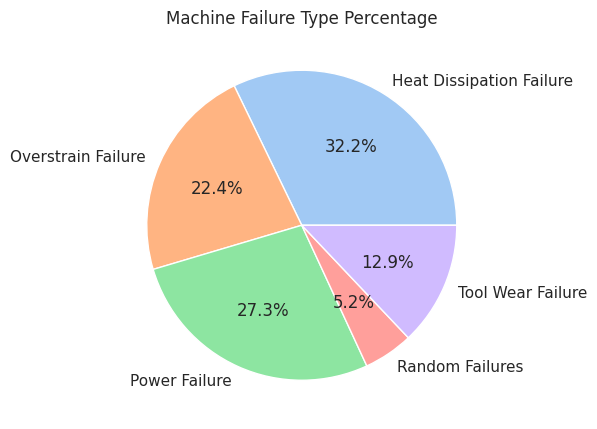

In [ ]:
print('Analyzing the main machine failures:')
print(50*'-')
print('\nNumber of failed and non-failed machines:\n0 - No Failure\n1 - Failure')
target = dataset[['Product ID', 'Target']].groupby('Target', as_index=False).count().rename(columns={'Product ID': 'Count'})
display(target)

print(50*'-')
print('\nFrequency of failure type:')
type_failure = dataset[['Failure Type', 'Target']].groupby('Failure Type', as_index=False).count().sort_values('Target', ascending=False).reset_index() \
                        .rename(columns={'Target': 'Count'})
display(type_failure)

print(50*'-')

qtd_failure = dataset[['Target','Failure Type']].loc[(dataset['Failure Type'] != 'No Failure')
                                                   ].groupby('Failure Type').count().reset_index()

sns.set(rc={'figure.figsize':(5,6)})
colors = sns.color_palette('pastel')
g = plt.pie(x=qtd_failure['Target'],
    labels=qtd_failure['Failure Type'],colors = colors, autopct='%.1f%%')

plt.title("Machine Failure Type Percentage")

plt.show()

Note: In the Machine Failure Type Percentage graph, machines that did not fail were not included, as they represent 96% of the data set. The purpose of the graph is to analyze the most common failures among machines.

It is observed that the most common type of failure is related to heat dissipation, while the least common is classified as random. Typically, faults are characterized by some specific type, which can provide valuable insights into the problems faced by machines.

Another important point to note in the third table is that the data set presents some machines with the target/status failed but the type indicates that there is no failure. These examples can confuse the model, with target indicating failure and type indicating that there is no failure, then these examples will be removed from the data set.

In [ ]:
print('\nClassification of failed machine but no failure of failure type:')
countnofailure = dataset.query("Target == 1 and `Failure Type` == 'No Failure'")[['Failure Type', 'Target']]

display(countnofailure)

print(30*'-')
print('\nMachine classification without failure but with failure type:')
countfailure = dataset.query("Target == 0 and `Failure Type` != 'No Failure'")[['Failure Type', 'Target']]

display(countfailure)


Classification of failed machine but no failure of failure type:


,Failure Type,Target
1437,No Failure,1
2749,No Failure,1
4044,No Failure,1
4684,No Failure,1
5536,No Failure,1
5941,No Failure,1
6478,No Failure,1
8506,No Failure,1
9015,No Failure,1


------------------------------

Machine classification without failure but with failure type:


,Failure Type,Target
1221,Random Failures,0
1302,Random Failures,0
1748,Random Failures,0
2072,Random Failures,0
2559,Random Failures,0
3065,Random Failures,0
3452,Random Failures,0
5471,Random Failures,0
5489,Random Failures,0
5495,Random Failures,0


Note: It is observed that in the tables above, there are machines classified as failing in the target field (Target), however the type of failure, in the field (Failure Type), indicates that there is no failure, and vice versa, with machines classified without faults and with the specified fault type. These examples can confuse the model because target indicates failure while type indicates no failure. Therefore, these examples will be removed from the dataset.

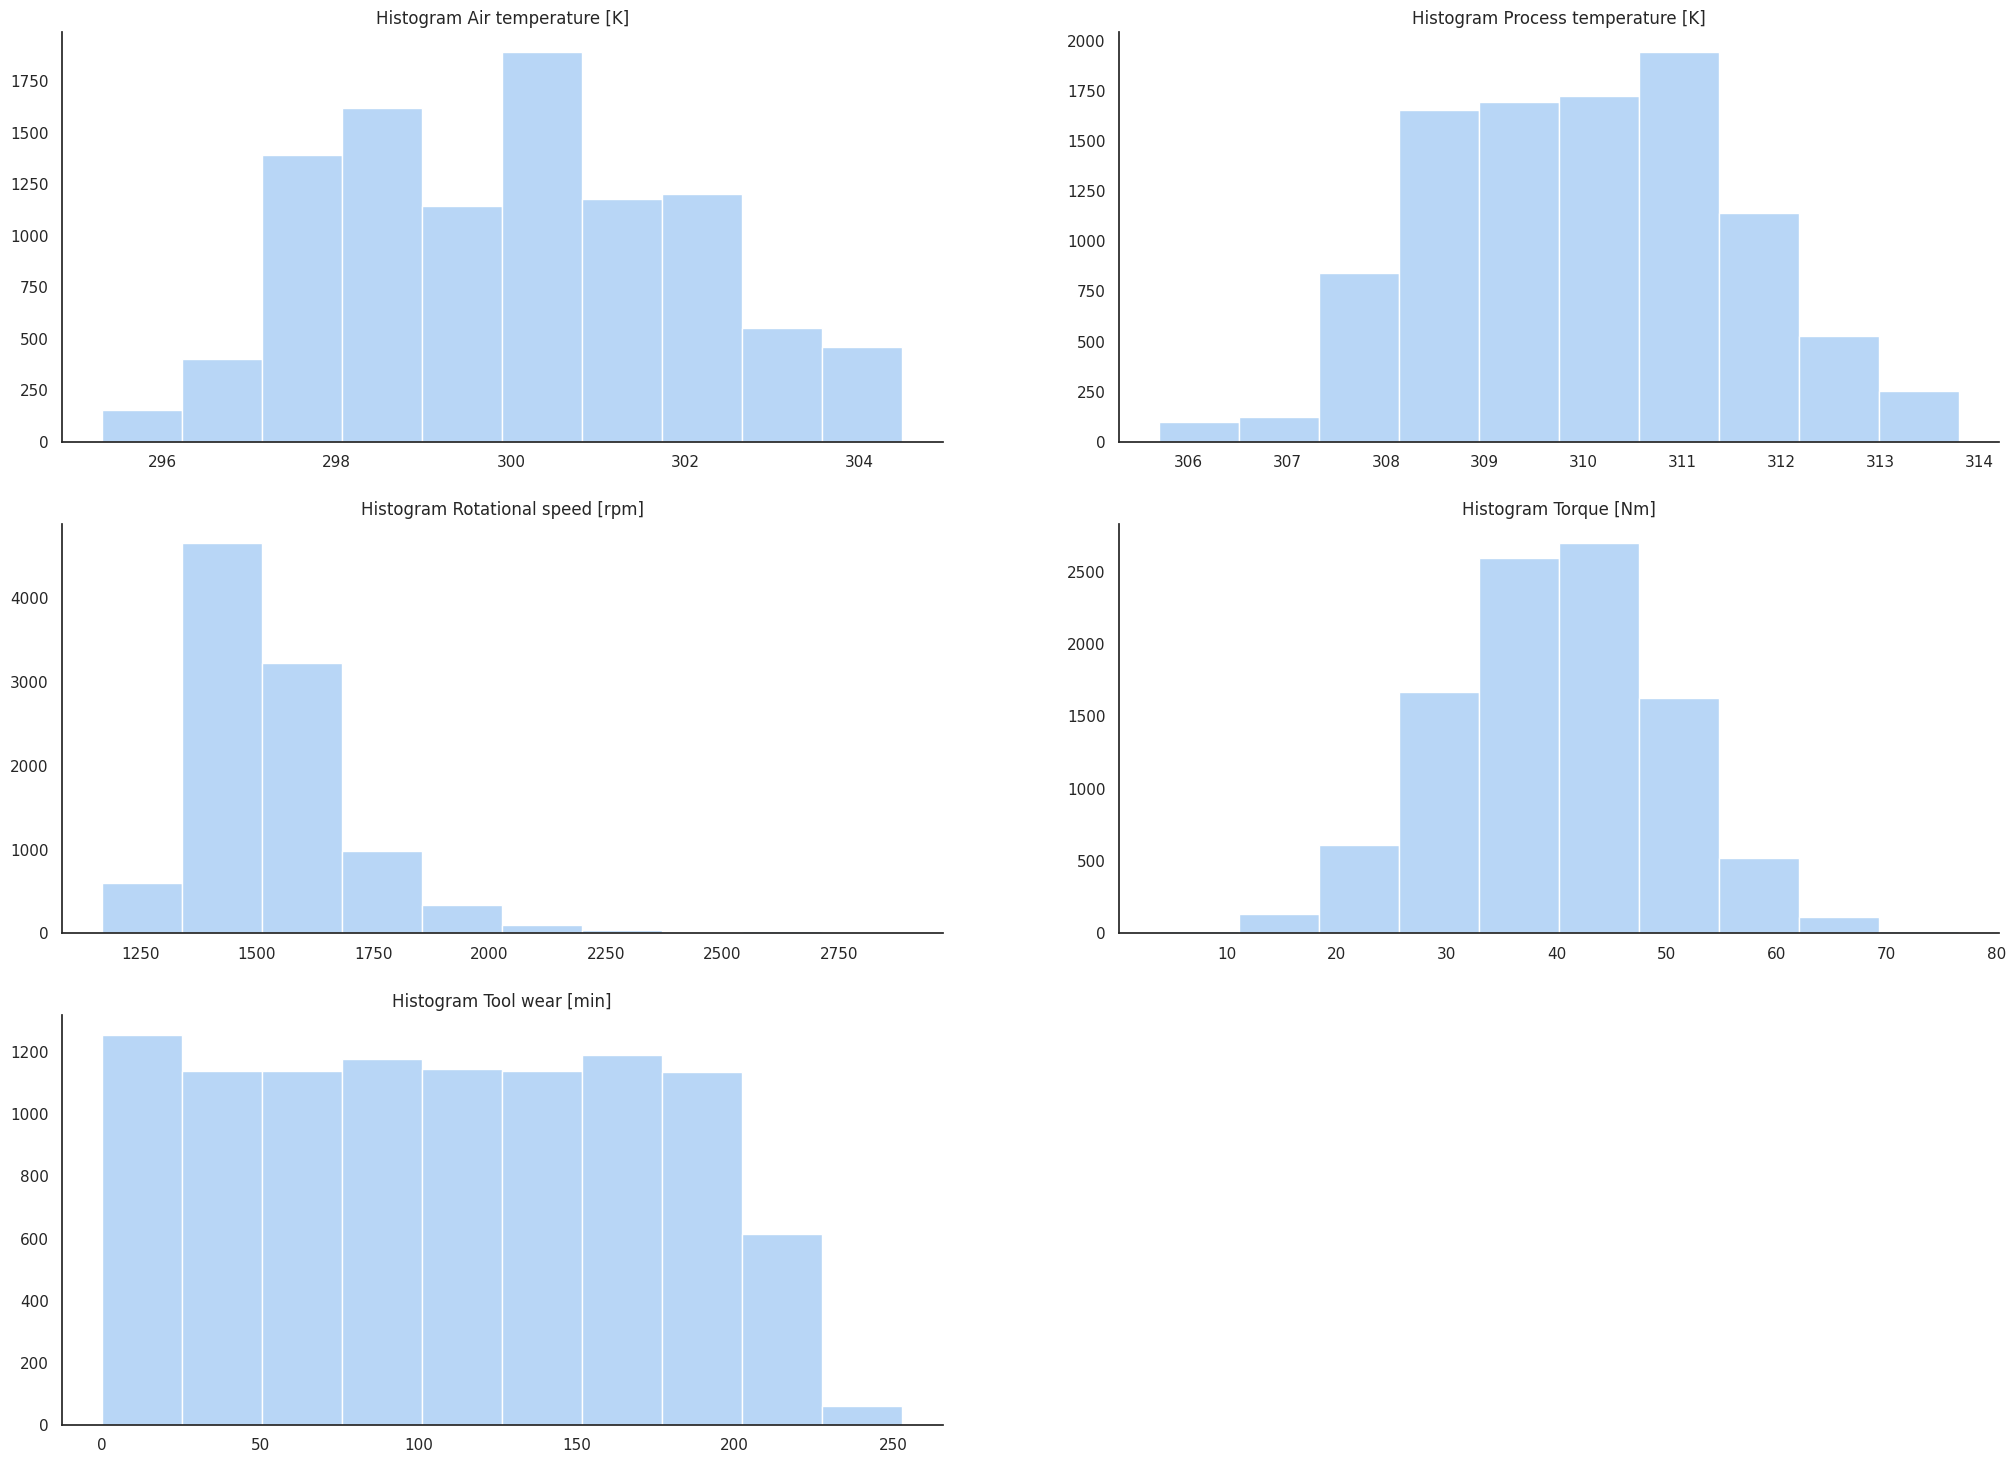

In [ ]:
columns_number = dataset.drop(columns=['Target', 'UDI']).select_dtypes(exclude=['object']).columns

plt.figure(figsize=(25, 50))
sns.set_style("white")
col_count = 1

for col in columns_number[:10]:
    plt.subplot(8, 2, col_count)
    sns.histplot(x=dataset[col], kde=False, bins=10, color='#a1c9f4')

    plt.title(f'Histogram {col}')
    plt.xlabel('')
    plt.ylabel('')

    col_count += 1

sns.despine()

Note: In the distribution graphs, it is observed that the numerical variables - Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm] - present a normal distribution. This means that most of the data is concentrated around the mean, with the frequency decreasing as we move away from the mean to both sides, forming a bell-shaped curve.


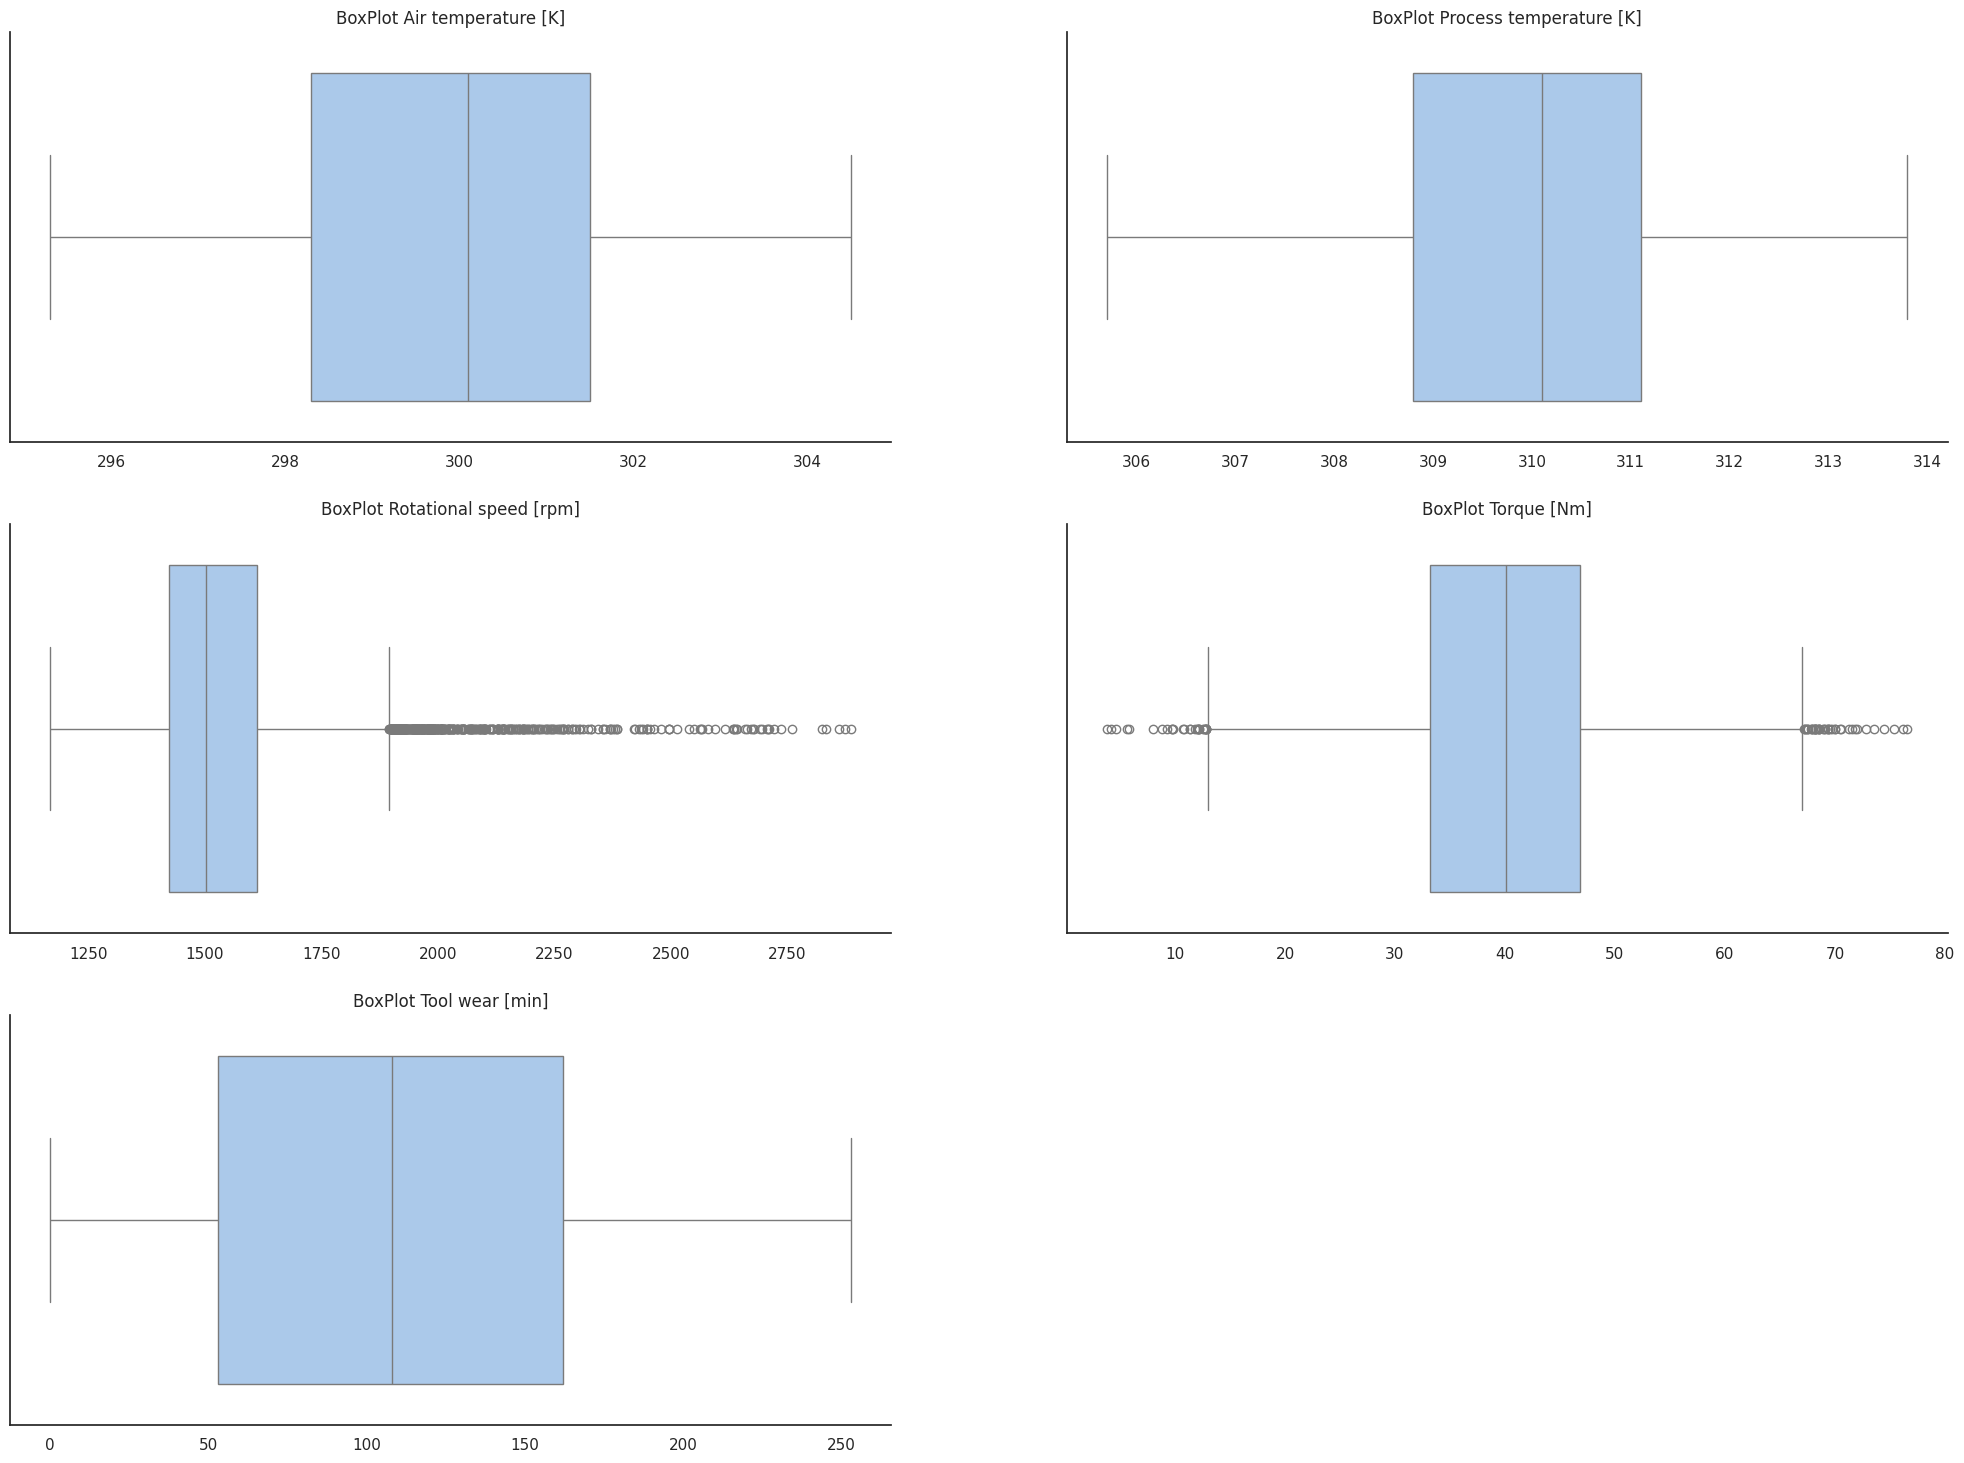

In [ ]:
columns_number = dataset.drop(columns=['Target', 'UDI']).select_dtypes(exclude=['object']).columns

plt.figure(figsize=(25, 50))
sns.set_style("white")
col_count = 1

for col in columns_number[:10]:
    plt.subplot(8, 2, col_count)
    sns.boxplot(x=dataset[col], color='#a1c9f4')

    plt.title(f'BoxPlot {col}')
    plt.xlabel('')
    plt.ylabel('')

    col_count += 1

sns.despine()
plt.show()

Note: In the boxplot graphs, it is observed that some variables present the presence of extreme values ​​or outliers. These values ​​stand out significantly from most data in terms of magnitude, as is the case with the Rotational speed [rpm] and Torque [Nm] variables.

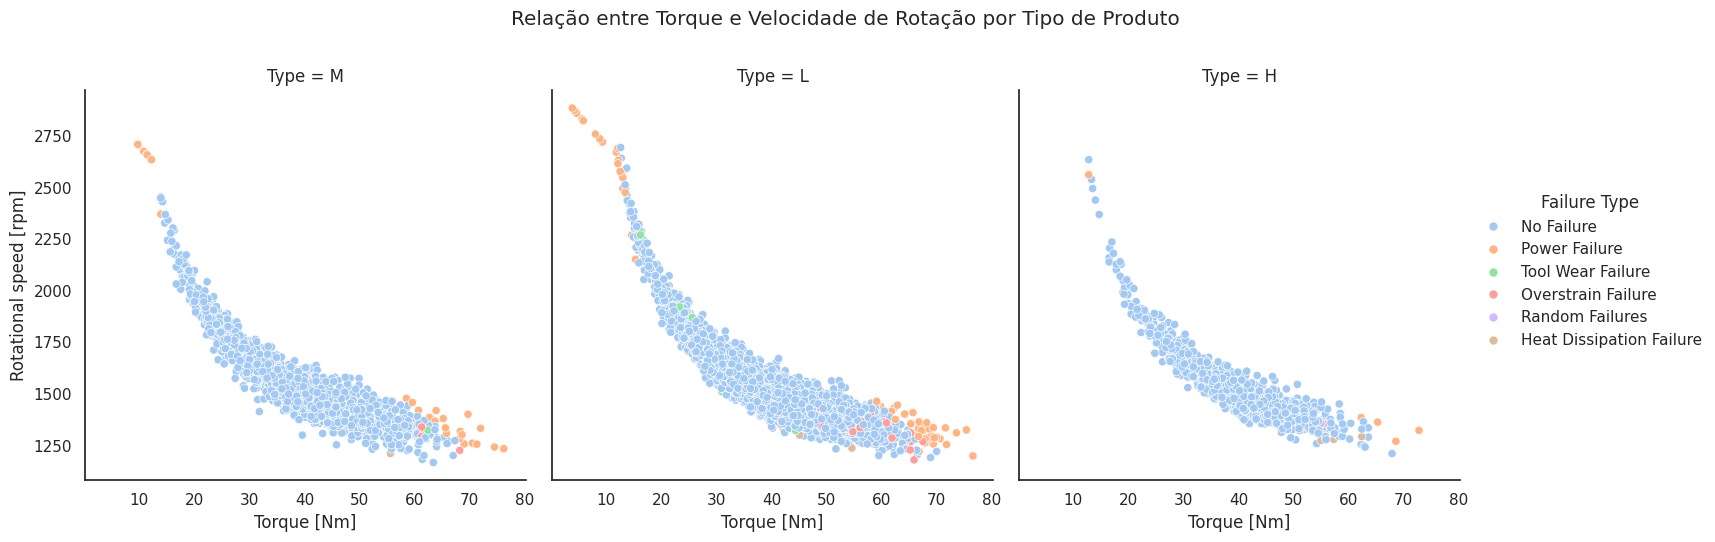

In [ ]:
sns.set_style("white")
sns.relplot(data=dataset, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='pastel');
plt.suptitle("Relação entre Torque e Velocidade de Rotação por Tipo de Produto", y=1.08)
sns.despine()
plt.show()

# Data Pre-Processing
In this section, we will apply pre-processing techniques to the dataset with the aim of preparing the data in a format suitable for the model.

In [ ]:
# removing characters not relevant columns name
def rename_coll(x:pd.DataFrame) -> pd.DataFrame:
    x.columns=x.columns.str.replace(r'\s*\[.*?\]\s*', '', regex=True).str.title().str.replace(' ', '')

rename_coll(dataset)

In [ ]:
# the ProductId column has the product type in its values, which is not necessary because in dataset it
# has a column with product type

# remove type
dataset['ProductId'] = dataset['ProductId'].apply(lambda x: x[1:])
dataset['ProductId'] = pd.to_numeric(dataset['ProductId'])

In [ ]:
# remove column UDI
dataset.drop(columns=['Udi'], axis=1, inplace=True)

In [ ]:
# remove data with contradictory target and failure type variables
dataset.drop(dataset[(dataset['Target'] == 1) & (dataset['FailureType'] == 'No Failure')].index, inplace=True)
dataset.drop(dataset[(dataset['Target'] == 0) & (dataset['FailureType'] != 'No Failure')].index, inplace=True)

**Enconding**

In [ ]:
# enconding in variable categoria ordering
code_type = {'L': 0, 'M': 1,  'H': 2}

dataset['Type'] = dataset['Type'].map(code_type)

# enconding in variable categoria not ordering
code_failure = {'No Failure': 0,'Heat Dissipation Failure': 1,'Power Failure': 2,'Overstrain Failure': 3,
                'Tool Wear Failure': 4}

dataset['FailureType'] = dataset['FailureType'].map(code_failure)

In [ ]:
print('Correlation')
dataset.corr().style.background_gradient(cmap='coolwarm')

Correlation


,ProductId,Type,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear,Target,FailureType
ProductId,1.000000,-0.752444,0.023092,0.063219,0.003476,0.000093,0.004961,0.028414,0.032596
Type,-0.752444,1.000000,-0.015252,-0.011988,-0.003874,-0.002970,-0.005616,-0.038448,-0.037361
AirTemperature,0.023092,-0.015252,1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066,0.037204
ProcessTemperature,0.063219,-0.011988,0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997,0.018706
RotationalSpeed,0.003476,-0.003874,0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042,-0.022282
Torque,0.000093,-0.002970,-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420,0.151658
ToolWear,0.004961,-0.005616,0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337,0.152424
Target,0.028414,-0.038448,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000,0.898028
FailureType,0.032596,-0.037361,0.037204,0.018706,-0.022282,0.151658,0.152424,0.898028,1.000000


Note: The Target and FailureType variables are highly correlated and as they are the target variables for our model, these variables will be combined to create a single variable.

In [ ]:
# merge variables target
dataset['TargetFailure'] = dataset['Target'].astype('str') + '-' + dataset['FailureType'].astype('str')

# enconding in variable TargetFailure
code_failure = {'0-0': 0,'1-1': 1,'1-2': 2,'1-3': 3,'1-4': 4}

dataset['TargetFailure'] = dataset['TargetFailure'].map(code_failure)

# Variable selection
In this section, the variables for the model will be selected and the data will be separated into training and test sets.

In [ ]:
# select variables
dataset = dataset.drop(columns=['ProductId', 'Target', 'FailureType'])

In [ ]:
# variable target
target = dataset[['TargetFailure']]
subset = dataset.drop(columns = ['TargetFailure'])

In [ ]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(subset,target,  test_size = 0.30, random_state=123)

In [ ]:
print(f'Train data - X: {X_train.shape[0]}')
print(f'Test data - X: {X_test.shape[0]}')
print(25*"-")
print(f'Train data - y: {y_train.shape[0]}')
print(f'Test data - y: {y_test.shape[0]}')

Train data - X: 6981
Test data - X: 2992
-------------------------
Train data - y: 6981
Test data - y: 2992


# XGBoost model (Extreme Gradient Boosting)

XGBoost is a scalable and distributed gradient boosted decision tree machine learning library. It is designed to be highly efficient, flexible and portable.

In [ ]:
# model
xgb = XGBClassifier(booster='gbtree',
                    n_estimators = 100,
                    max_depth = 5,
                    learning_rate = 0.05,
                    subsample = 0.8,
                    objective='multi:softmax',
                    num_class=4,
                    random_state=0)

In [ ]:
# training model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
# predict data
y_pred = xgb.predict(X_test)

# Evaluating the model

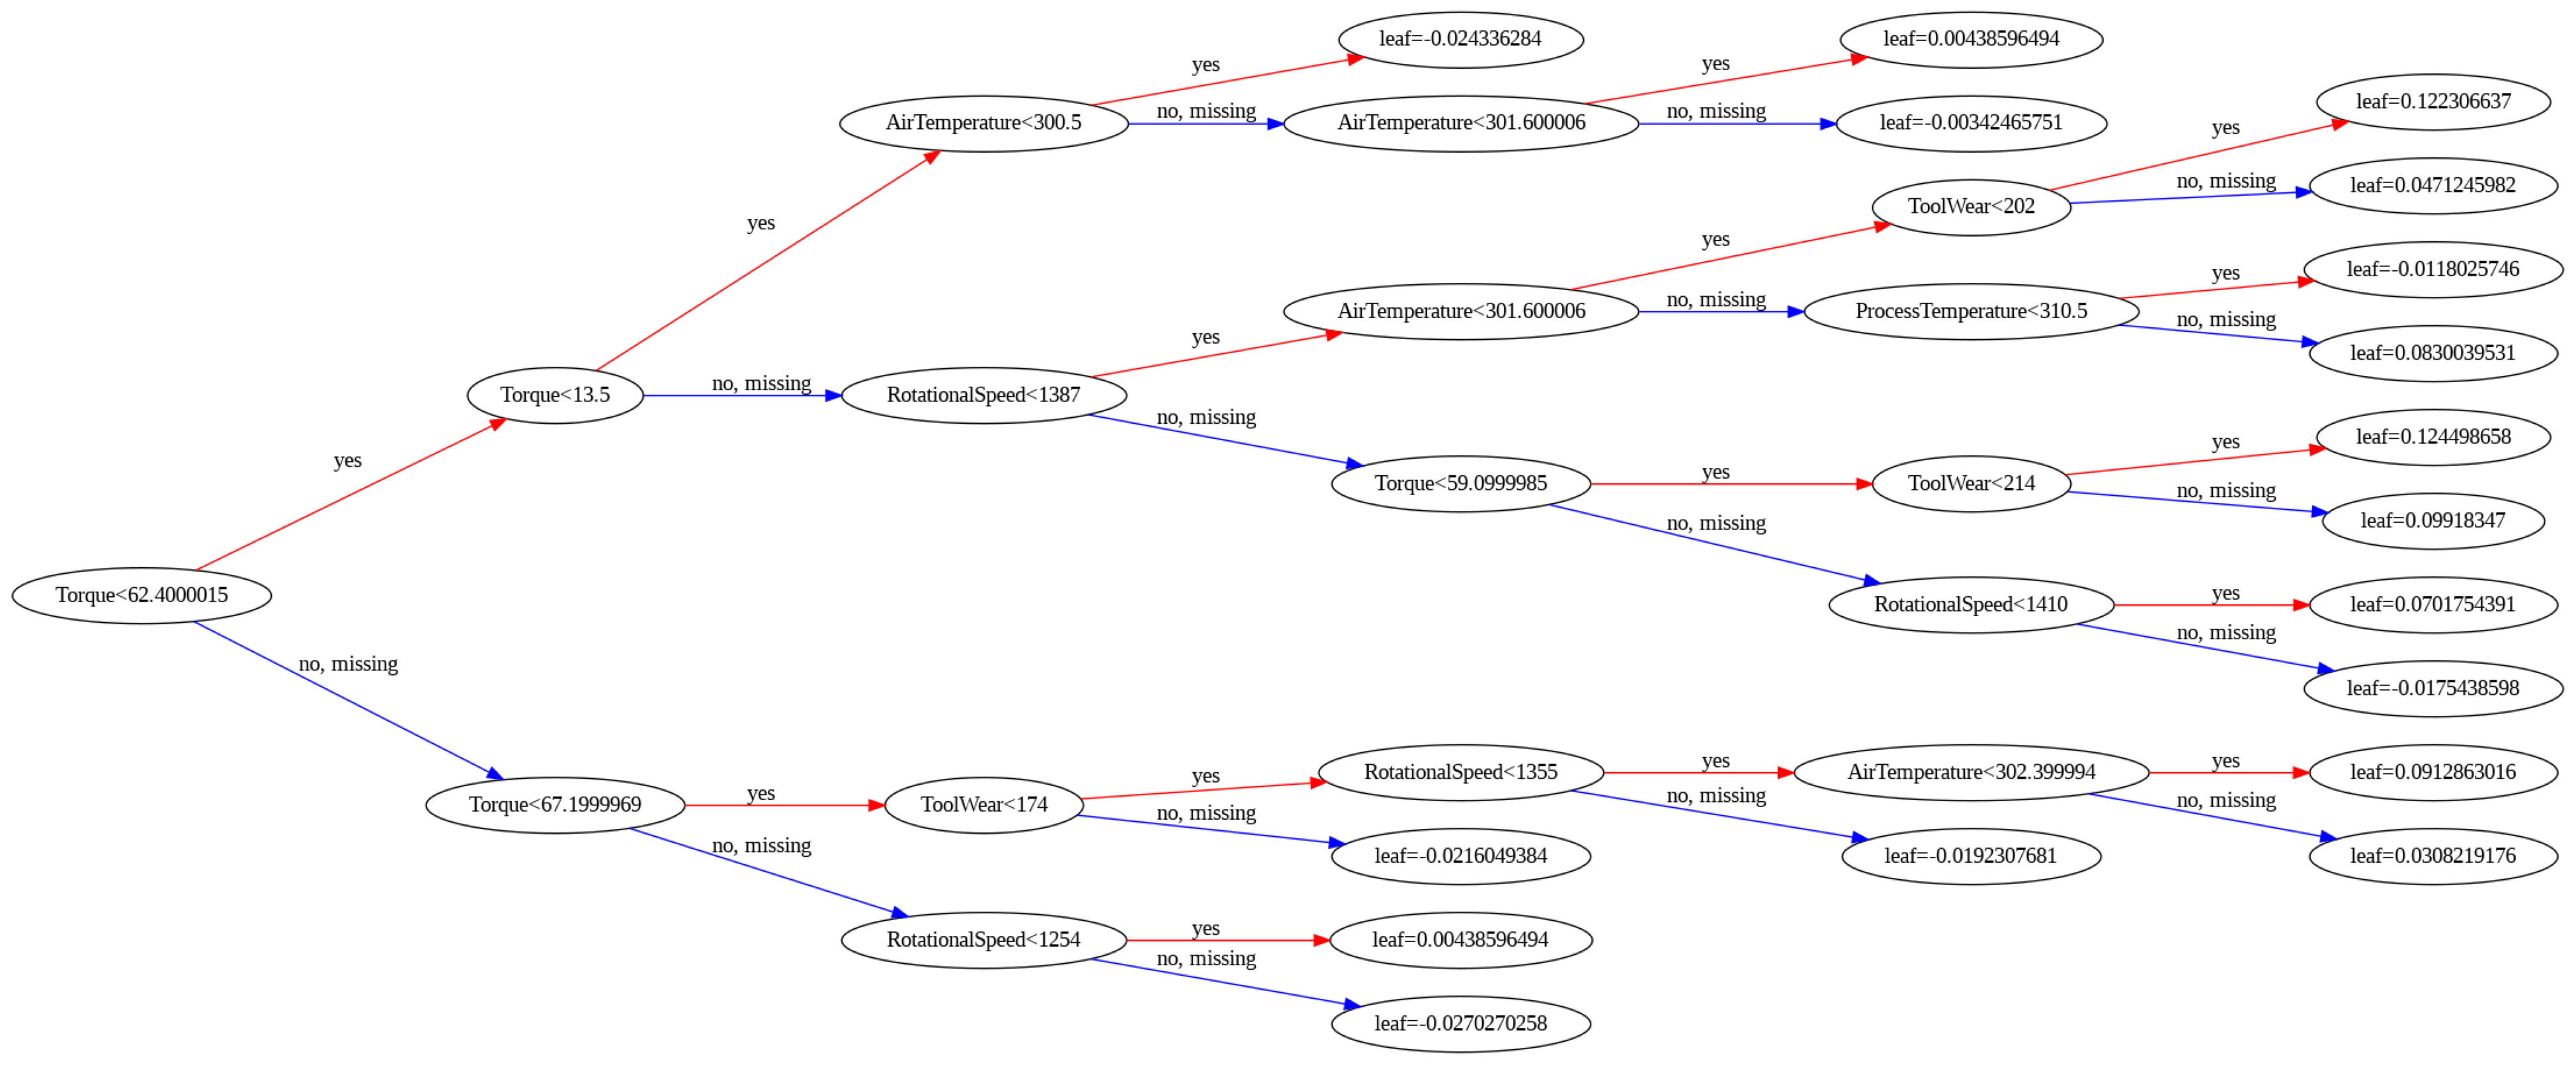

In [ ]:
# plot model tree - for a better preview, double click on the graph
fig, ax = plt.subplots(figsize=(50, 100))
plot_tree(xgb, ax=ax,  rankdir='LR')
plt.show()

In [ ]:
# values confusion matrix
matrix = confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(matrix,
                     index = ['No Failure','Heat Dissipation Failure','Power Failure', 'Overstrain Failure', 'Tool Wear Failure'],
                     columns = ['No Failure','Heat Dissipation Failure','Power Failure', 'Overstrain Failure', 'Tool Wear Failure'])

matrix_df

,No Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Tool Wear Failure
No Failure,2883,3,5,1,0
Heat Dissipation Failure,5,23,0,0,0
Power Failure,5,0,17,4,0
Overstrain Failure,6,0,0,25,0
Tool Wear Failure,15,0,0,0,0


In [ ]:
# accurary model
print(f'Accurary Model: {round(accuracy_score(y_test, y_pred)*100,3)}%')

Accurary Model: 98.529%


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2892
           1       0.88      0.82      0.85        28
           2       0.77      0.65      0.71        26
           3       0.83      0.81      0.82        31
           4       0.00      0.00      0.00        15

    accuracy                           0.99      2992
   macro avg       0.70      0.66      0.67      2992
weighted avg       0.98      0.99      0.98      2992



In [ ]:
# performance on training data
y_pred_train = xgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

#  performance on test data
y_pred_test = xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Performance on training data:", train_accuracy)
print("Performance on test data:", test_accuracy)

Performance on training data: 0.9955593754476436
Performance on test data: 0.9852941176470589


In [ ]:
# feature importance -  feature most frequently
importance = xgb.get_booster().get_score(importance_type='weight')

# feature name and the importance
features = [feature for feature in importance.keys()]
importances = [importance[feature] for feature in features]

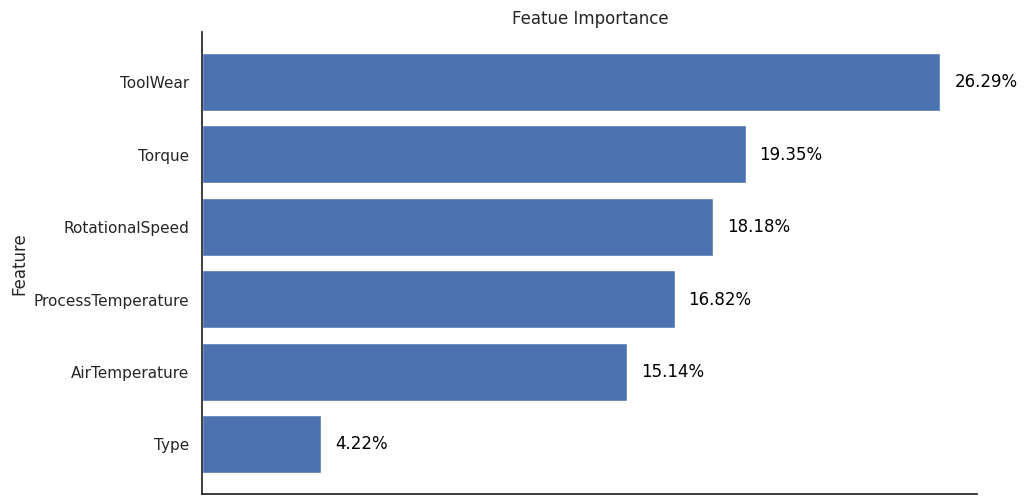

In [ ]:
# graph
importances_percentage =sorted([(imp / sum(importances)) * 100 for imp in importances])

plt.figure(figsize=(10, 6))
sns.set_style("white")
bars = plt.barh(features, importances_percentage)

for bar, importance in zip(bars, importances_percentage):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{importance:.2f}%',
             va='center', ha='left', color='black')

plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Feature')
plt.title('Featue Importance')
sns.despine()
plt.show()

Conclusion

The XGBoost model was configured to deal with a multi-class classification problem, with four classes representing failure indicators and types of machine failures. After creating the model, training and evaluation of its performance were carried out using various metrics, focusing especially on accuracy. The model achieved an accuracy of 98.53% on test data, which demonstrates its effectiveness in classifying samples.

In addition, there was an analysis of the model's performance on both training and test data to assess the possibility of overfitting or underfitting. With values ​​of 99% and 98% respectively, the model presented a consistent and robust performance in both situations, indicating a good generalization capacity.

An analysis of the importance of variables in the classification process was also carried out. We observed that the ToolWear variable (tool wear) was identified as the most influential, followed by Torque and RotationalSpeed ​​(rotational speed), which is in line with intuition, as these variables generally directly impact production quality.

In summary, an effective model was obtained for the data set in question. We recognize that, in a real scenario, additional challenges could be faced and further experiments and model iterations would be necessary to achieve an even more refined solution suited to the specific needs of the problem.